In [ ]:
pip install pandas

In [ ]:
pip install numpy

In [ ]:
pip install nltk

In [ ]:
pip install scikit-learn

In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

In [ ]:
pip install wordcloud

In [ ]:
pip install bokeh

In [ ]:
pip install xgboost

In [1]:
import pandas as pd
import string
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
import numpy
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
data = pd.read_csv('University_review.csv')#load dataset of University review
print(data.head())# Show first few rows

   RATING                                             REVIEW
0       1  Ajman University is highly regarded for its di...
1       1  as soon as i stepped through the university do...
2       1  Ajman university is a good place to study, pro...
3       1  A wonderful university. I'm a new student and ...
4       1  I am so glad to be accepted at my dream univer...


In [7]:
len(data.index)

206

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   RATING  206 non-null    int64 
 1   REVIEW  206 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.3+ KB


In [11]:
print(data.shape)

(206, 2)


In [13]:
print('Number of positive, neutral and negative reviews: ', data.RATING.value_counts()) #count of positve,neutral and negative reviews

Number of positive, neutral and negative reviews:  RATING
 1    112
 0     49
-1     45
Name: count, dtype: int64


In [19]:
print('Percentage of positive, neutral and negative reviews: ', data.RATING.value_counts() / len(data)*(100))

Percentage of positive, neutral and negative reviews:  RATING
 1    54.368932
 0    23.786408
-1    21.844660
Name: count, dtype: float64


In [21]:
length_reviews = data.REVIEW.str.len()
print('maximum length review:',max(length_reviews))
print('minimum length review:',min(length_reviews))

maximum length review: 1372
minimum length review: 3


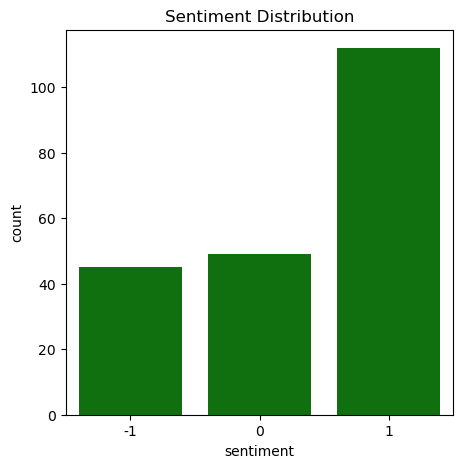

In [23]:
#data exploration visualization
plt.figure(figsize=(5,5))
sns.countplot(x=data['RATING'],data=data,color='green')
plt.title('Sentiment Distribution')
plt.xlabel('sentiment')
plt.ylabel('count')
plt.show()

In [25]:
#generating wordcloud to visualize the word importance or frequency
all_reviews= ''.join(data['REVIEW']) #combine all reviews into a single string
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(all_reviews) #generate wordcloud

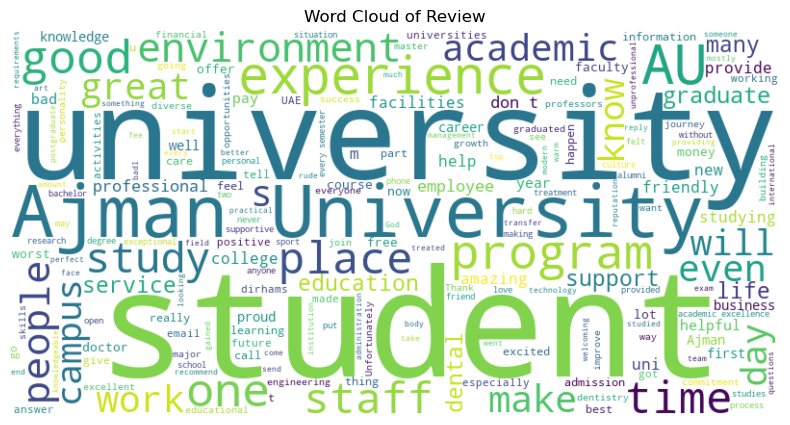

In [27]:
#displaying wordcloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Review")
plt.show()

In [29]:
#wordcloud of positive review only
positive_review=data[data['RATING']==1]['REVIEW']
positive_text= ''.join(positive_review)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

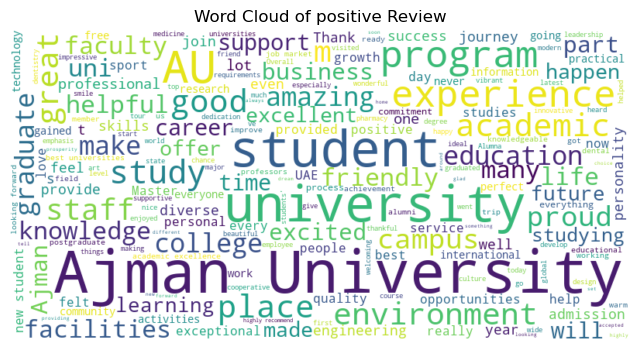

In [31]:
#displaying wordcloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of positive Review")
plt.show()

In [33]:
#wordcloud of neutral review only
neutral_review=data[data['RATING']==0]['REVIEW']
neutral_text= ''.join(neutral_review)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

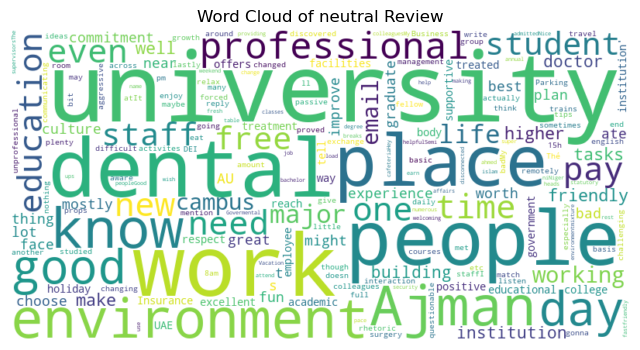

In [35]:
#displaying wordcloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of neutral Review")
plt.show()

In [37]:
#wordcloud of negative review only
negative_review=data[data['RATING']==-1]['REVIEW']
negative_text= ''.join(negative_review)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

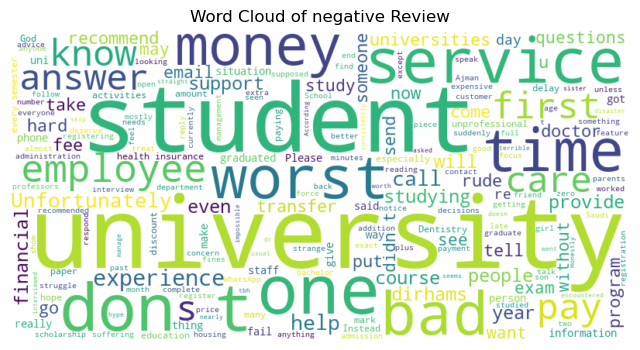

In [39]:
#displaying wordcloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of negative Review")
plt.show()

In [ ]:
#DTATA PREPROCESSING
#1.Lowercasing
#2.Remove characters, special characters, and digits 
#3.Handling negations
#4.Tokenization
#5.Stop words removal
#6.Lemmatization

In [43]:
data['lower_review']=data['REVIEW'].str.lower()#lowercasing
print(data['lower_review'])

0      ajman university is highly regarded for its di...
1      as soon as i stepped through the university do...
2      ajman university is a good place to study, pro...
3      a wonderful university. i'm a new student and ...
4      i am so glad to be accepted at my dream univer...
                             ...                        
201    a very bad way to contact students none of the...
202    if you wanted to have a free dental check up a...
203          great place to learn and aquire new skills.
204    thank you for your information reply for my in...
205                       amazing service, lovely people
Name: lower_review, Length: 206, dtype: object


In [61]:
#removing punctuation
data['no_punctuation_review']=data['lower_review'].str.translate(str.maketrans('','',string.punctuation))
print(data['no_punctuation_review'])

0      ajman university is highly regarded for its di...
1      as soon as i stepped through the university do...
2      ajman university is a good place to study prov...
3      a wonderful university im a new student and i ...
4      i am so glad to be accepted at my dream univer...
                             ...                        
201    a very bad way to contact students none of the...
202    if you wanted to have a free dental check up a...
203           great place to learn and aquire new skills
204    thank you for your information reply for my in...
205                        amazing service lovely people
Name: no_punctuation_review, Length: 206, dtype: object


In [67]:
#removing special characters, digits
def remove_special(text):
    text=re.sub(r'\d+','',text)
    text=re.sub(r'\d+','',text)
    return text
data['no_special_review']=data['no_punctuation_review'].apply(remove_special)
print(data['no_special_review'])

0      ajman university is highly regarded for its di...
1      as soon as i stepped through the university do...
2      ajman university is a good place to study prov...
3      a wonderful university im a new student and i ...
4      i am so glad to be accepted at my dream univer...
                             ...                        
201    a very bad way to contact students none of the...
202    if you wanted to have a free dental check up a...
203           great place to learn and aquire new skills
204    thank you for your information reply for my in...
205                        amazing service lovely people
Name: no_special_review, Length: 206, dtype: object


In [71]:
#handling negations
def handle_negation(text):
    tokens=word_tokenize(text)
    negated_tokens=[]
    negation_words=set(["not","no","never","n't"])
    skip=False
    for i, word in enumerate(tokens):
        if word in negation_words:
            skip=True
        elif skip:
            negated_tokens.append(f'not_{word}')
            skip=False
        else:
            negated_tokens.append(word)
    return ' '.join(negated_tokens)
data['negated_reviews']=data['no_special_review'].apply(handle_negation)
print(data['negated_reviews'])
print(data['negated_reviews'][20])

0      ajman university is highly regarded for its di...
1      as soon as i stepped through the university do...
2      ajman university is a good place to study prov...
3      a wonderful university im a new student and i ...
4      i am so glad to be accepted at my dream univer...
                             ...                        
201    a very bad way to contact students none of the...
202    if you wanted to have a free dental check up a...
203           great place to learn and aquire new skills
204    thank you for your information reply for my in...
205                        amazing service lovely people
Name: negated_reviews, Length: 206, dtype: object
my experience in this university was life changing maybe not_only because of the university life but mostly the exchange group


In [73]:
#tokenization
data['tokenized_reviews']=data['negated_reviews'].apply(word_tokenize)
print(data['tokenized_reviews'])

0      [ajman, university, is, highly, regarded, for,...
1      [as, soon, as, i, stepped, through, the, unive...
2      [ajman, university, is, a, good, place, to, st...
3      [a, wonderful, university, im, a, new, student...
4      [i, am, so, glad, to, be, accepted, at, my, dr...
                             ...                        
201    [a, very, bad, way, to, contact, students, non...
202    [if, you, wanted, to, have, a, free, dental, c...
203    [great, place, to, learn, and, aquire, new, sk...
204    [thank, you, for, your, information, reply, fo...
205                   [amazing, service, lovely, people]
Name: tokenized_reviews, Length: 206, dtype: object


In [77]:
#stop word removal
stop_words=set(stopwords.words('english'))
data['filtered_reviews']=data['tokenized_reviews'].apply(lambda x: [word for word in x if word not in stop_words])
print(data['filtered_reviews'])

0      [ajman, university, highly, regarded, diverse,...
1      [soon, stepped, university, doors, felt, home,...
2      [ajman, university, good, place, study, provid...
3      [wonderful, university, im, new, student, tell...
4      [glad, accepted, dream, university, ajman, lov...
                             ...                        
201    [bad, way, contact, students, none, employees,...
202    [wanted, free, dental, check, treatment, ajman...
203           [great, place, learn, aquire, new, skills]
204                 [thank, information, reply, inquiry]
205                   [amazing, service, lovely, people]
Name: filtered_reviews, Length: 206, dtype: object


In [ ]:
#lemmatization
#nltk.download('omw-1.4')

In [81]:
#lemmatization
lemmatizer=WordNetLemmatizer()
data['lemmatized_reviews']=data['filtered_reviews'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
print(data['lemmatized_reviews'])

0      [ajman, university, highly, regarded, diverse,...
1      [soon, stepped, university, door, felt, home, ...
2      [ajman, university, good, place, study, provid...
3      [wonderful, university, im, new, student, tell...
4      [glad, accepted, dream, university, ajman, lov...
                             ...                        
201    [bad, way, contact, student, none, employee, t...
202    [wanted, free, dental, check, treatment, ajman...
203            [great, place, learn, aquire, new, skill]
204                 [thank, information, reply, inquiry]
205                   [amazing, service, lovely, people]
Name: lemmatized_reviews, Length: 206, dtype: object


In [ ]:
#DATA TRANSFORMATION
    #text vectorization
        #1. Bag of words
        #2. TF-IDF vectorization

In [93]:
data['lemmatized_reviews_joined'] = data['lemmatized_reviews'].apply(lambda x: ' '.join(x))

# Apply Bag of Words
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(data['lemmatized_reviews_joined'])

# Display BoW matrix
#print(X_bow.toarray())

In [95]:
bow = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())
print(bow)

     abdullah  ability  able  abroad  absent  academic  academically  \
0           0        0     0       0       0         1             0   
1           0        0     0       0       0         0             0   
2           0        0     0       0       0         0             0   
3           0        0     0       0       0         0             0   
4           0        0     0       0       0         0             0   
..        ...      ...   ...     ...     ...       ...           ...   
201         0        0     0       0       0         0             0   
202         0        0     0       0       0         0             0   
203         0        0     0       0       0         0             0   
204         0        0     0       0       0         0             0   
205         0        0     0       0       0         0             0   

     accelerate  acceptance  accepted  ...  worse  worst  worth  would  write  \
0             0           0         0  ...      0     

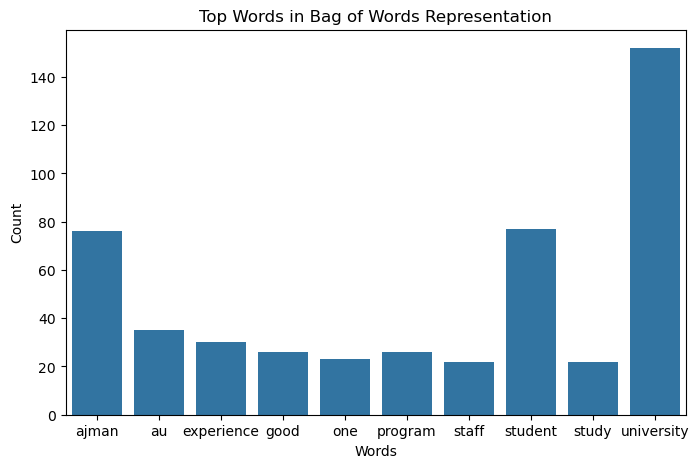

In [101]:
#visualization of BoW
# Plotting the features
vectorizerforfeatures = CountVectorizer(max_features=10)
X_bowten = vectorizerforfeatures.fit_transform(data['lemmatized_reviews_joined'])
featuresten = vectorizerforfeatures.get_feature_names_out()
countsten = X_bowten.toarray().sum(axis=0)

plt.figure(figsize=(8, 5))
sns.barplot(x=featuresten, y=countsten)
plt.title('Top Words in Bag of Words Representation')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

In [103]:
#from sklearn.feature_extraction.text import TfidfVectorizer

# Apply TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(data['lemmatized_reviews_joined'])

In [105]:
# Display TF-IDF matrix
X_tf = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
print(X_tf)

     abdullah  ability  able  abroad  absent  academic  academically  \
0         0.0      0.0   0.0     0.0     0.0   0.21252           0.0   
1         0.0      0.0   0.0     0.0     0.0   0.00000           0.0   
2         0.0      0.0   0.0     0.0     0.0   0.00000           0.0   
3         0.0      0.0   0.0     0.0     0.0   0.00000           0.0   
4         0.0      0.0   0.0     0.0     0.0   0.00000           0.0   
..        ...      ...   ...     ...     ...       ...           ...   
201       0.0      0.0   0.0     0.0     0.0   0.00000           0.0   
202       0.0      0.0   0.0     0.0     0.0   0.00000           0.0   
203       0.0      0.0   0.0     0.0     0.0   0.00000           0.0   
204       0.0      0.0   0.0     0.0     0.0   0.00000           0.0   
205       0.0      0.0   0.0     0.0     0.0   0.00000           0.0   

     accelerate  acceptance  accepted  ...  worse  worst  worth  would  write  \
0           0.0         0.0  0.000000  ...    0.0    0

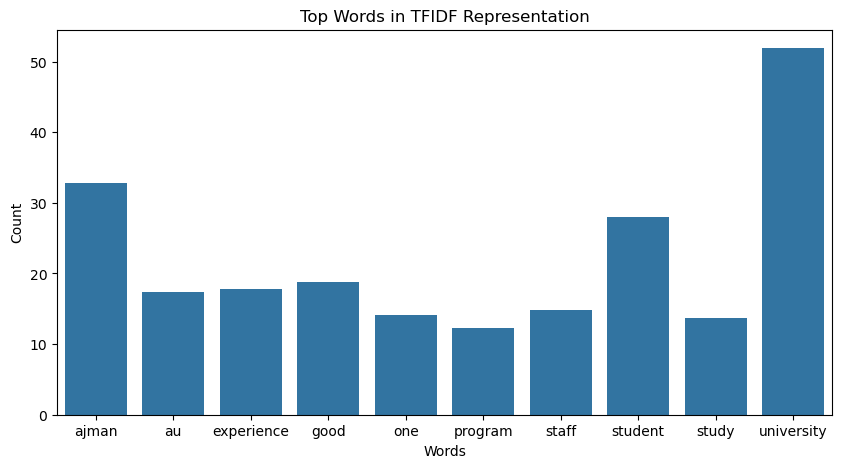

In [109]:
# Plotting the features
tfidfvectorizertopfeatures = TfidfVectorizer(max_features=10)
X_tfidftopfeatures = tfidfvectorizertopfeatures.fit_transform(data['lemmatized_reviews_joined'])
featurestop = tfidfvectorizertopfeatures.get_feature_names_out()
countstop = X_tfidftopfeatures.toarray().sum(axis=0)

plt.figure(figsize=(10, 5))
sns.barplot(x=featurestop, y=countstop)
plt.title('Top Words in TFIDF Representation')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

In [ ]:
#split the dataset before doing vectorization, since it leads to data leakage
#Split the dataset into training and test sets.
#Perform vectorization (like TF-IDF or Count Vectorizer) on the training set.
#Apply the same vectorizer to the test set without refitting.

In [235]:
#from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X=data['lemmatized_reviews_joined'] #reviews from the dataset
y=data['RATING'] #sentiments from the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [237]:
#Initialize the TF-IDF Vectorizer and fit_transform on the training data
vectorizerfinal = TfidfVectorizer()  
X_train_vec = vectorizerfinal.fit_transform(X_train)  # Fit and transform the training data
#Transform the test data (without fitting again)
X_test_vec = vectorizerfinal.transform(X_test)

In [175]:
#naive bayes classifier
#from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()# Initialize the model
model.fit(X_train_vec, y_train)# Train the model

MultinomialNB()

In [177]:
#from sklearn.metrics import accuracy_score, classification_report

# Predict on the test data
y_pred = model.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
#precision = _prf_divide(tp_sum, pred_sum, 'precision',
                       # 'predicted', average, warn_for, zero_division)

# Classification report (precision, recall, f1-score)
print(classification_report(y_test, y_pred))

Accuracy: 57.14%
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         8
           0       0.00      0.00      0.00        10
           1       0.57      1.00      0.73        24

    accuracy                           0.57        42
   macro avg       0.19      0.33      0.24        42
weighted avg       0.33      0.57      0.42        42



C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 800x500 with 0 Axes>

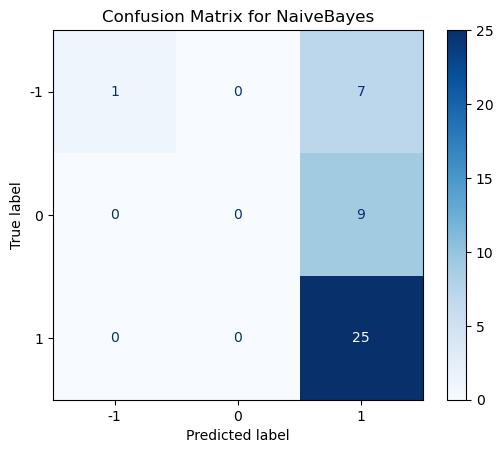

In [159]:
#confusion matrix
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test and y_pred are defined
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)#['Negative', 'Positive','Neutral'])

plt.figure(figsize=(8, 5))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for NaiveBayes')
plt.show()

In [191]:
#from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train_vec, y_train)

SVC(kernel='linear')

In [193]:
#from sklearn.metrics import accuracy_score, classification_report

# Predict on the test data
y_pred = model.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:2f}%")

# Classification report (precision, recall, f1-score)
print(classification_report(y_test, y_pred))

Accuracy: 73.809524%
              precision    recall  f1-score   support

          -1       0.67      0.75      0.71         8
           0       0.71      0.50      0.59        10
           1       0.77      0.83      0.80        24

    accuracy                           0.74        42
   macro avg       0.72      0.69      0.70        42
weighted avg       0.74      0.74      0.73        42



<Figure size 800x500 with 0 Axes>

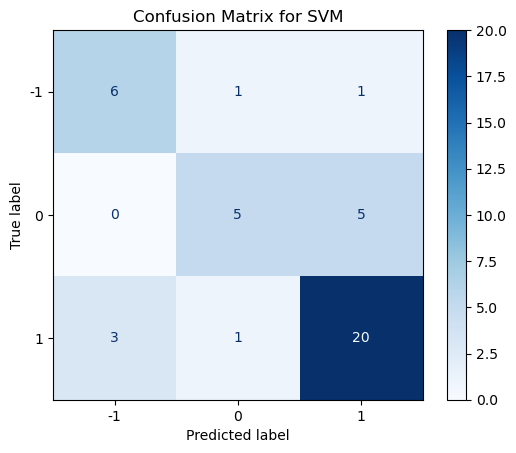

In [195]:
#confusion matrix
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test and y_pred are defined
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)#['Negative', 'Positive','Neutral'])

plt.figure(figsize=(8, 5))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVM')
plt.show()

In [197]:
# Logistic Regression model
#from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train_vec, y_train)
#from sklearn.metrics import accuracy_score, classification_report

# Predict on the test data
y_pred = model.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

# Classification report (precision, recall, f1-score)
print(classification_report(y_test, y_pred))

Accuracy: 73.81%
              precision    recall  f1-score   support

          -1       0.67      0.75      0.71         8
           0       0.71      0.50      0.59        10
           1       0.77      0.83      0.80        24

    accuracy                           0.74        42
   macro avg       0.72      0.69      0.70        42
weighted avg       0.74      0.74      0.73        42



<Figure size 800x500 with 0 Axes>

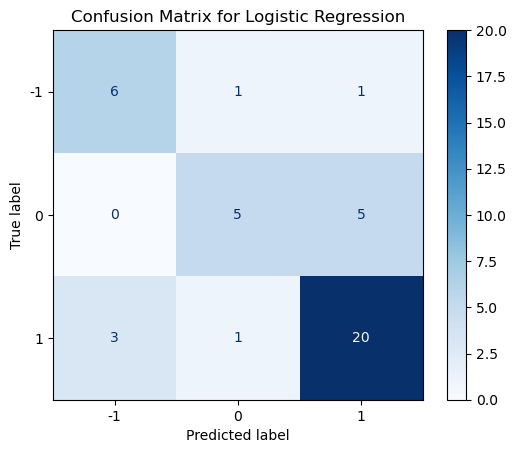

In [199]:
#confusion matrix
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test and y_pred are defined
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)#['Negative', 'Positive','Neutral'])

plt.figure(figsize=(8, 5))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [239]:
# Random Forest model
#from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_vec, y_train)

# Predictions and evaluation
y_pred = rf_model.predict(X_test_vec)
accuracy=accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

# Classification report (precision, recall, f1-score)
print(classification_report(y_test, y_pred))

Accuracy: 76.19%
              precision    recall  f1-score   support

          -1       0.88      0.88      0.88         8
           0       0.67      0.40      0.50        10
           1       0.75      0.88      0.81        24

    accuracy                           0.76        42
   macro avg       0.76      0.72      0.73        42
weighted avg       0.75      0.76      0.75        42



<Figure size 800x500 with 0 Axes>

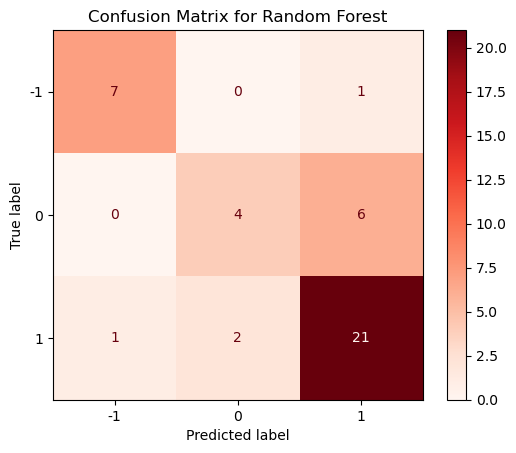

In [266]:
#confusion matrix
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test and y_pred are defined
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)#['Negative', 'Positive','Neutral'])

plt.figure(figsize=(8, 5))
disp.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [211]:
#from sklearn.neighbors import KNeighborsClassifier

# KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_vec, y_train)

# Predictions and evaluation
y_pred = knn_model.predict(X_test_vec)
accuracy=accuracy_score(y_test, y_pred))
print(f"Accuracy: {accuracy*100:.2}")

# Classification report (precision, recall, f1-score)
#print(classification_report(y_test, y_pred))

Accuracy: 64.29%
              precision    recall  f1-score   support

          -1       0.50      0.50      0.50         8
           0       0.56      0.50      0.53        10
           1       0.72      0.75      0.73        24

    accuracy                           0.64        42
   macro avg       0.59      0.58      0.59        42
weighted avg       0.64      0.64      0.64        42



<Figure size 800x500 with 0 Axes>

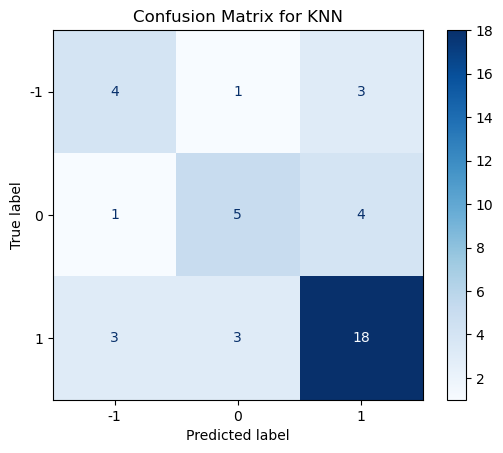

In [213]:
#confusion matrix
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test and y_pred are defined
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)#['Negative', 'Positive','Neutral'])

plt.figure(figsize=(8, 5))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for KNN')
plt.show()

In [221]:
#from sklearn.tree import DecisionTreeClassifier
# Train a Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_vec, y_train)
# Make predictions on the test set
y_pred = decision_tree.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

# Classification report (Precision, Recall, F1-Score)
print(classification_report(y_test, y_pred))

Accuracy: 69.05%
              precision    recall  f1-score   support

          -1       0.71      0.62      0.67         8
           0       0.42      0.50      0.45        10
           1       0.83      0.79      0.81        24

    accuracy                           0.69        42
   macro avg       0.65      0.64      0.64        42
weighted avg       0.71      0.69      0.70        42



<Figure size 800x500 with 0 Axes>

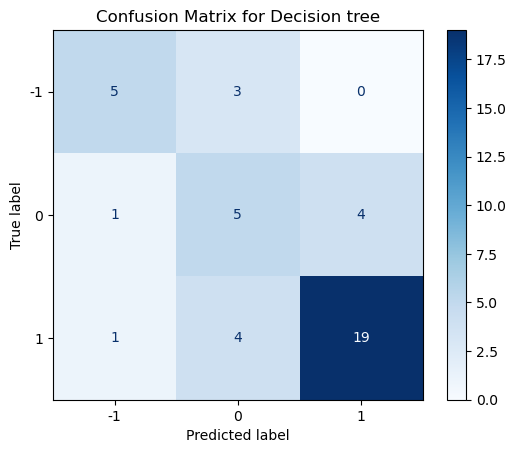

In [223]:
#confusion matrix
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test and y_pred are defined
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)#['Negative', 'Positive','Neutral'])

plt.figure(figsize=(8, 5))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision tree')
plt.show()

In [258]:
#prediction on new reviews:
new_reviews = [
    "Great environment and exposure",
    "Terrible alumni support and career development services",
    "It gets worse with new decisions",
    "affordable eduction",
    "The doctors and traines are un professional,since it was free of charge the way the people were treated was horrible , the employee are a good example of a body which is not governed well.Really a disappointment , watching so called doctors missing etitiqates to deal with other human being ,A hint of racism was also obseved , the tokens were disturbuted to the Arab nationals first and then the asians .Otherwise the work done by the trainee was okay",
    "The university is excellent, even all the doctors are treated wonderfully, but the treatment of the financial staff is very bad. If the student is late for one day, he will be fined"
]

#Transform the new reviews using the same TfidfVectorizer
#vectorizerfinal = TfidfVectorizer()
new_reviews_vec = vectorizerfinal.transform(new_reviews)

#Predict sentiment using the trained Random Forest model
predicted_sentiments = rf_model.predict(new_reviews_vec)

# display the predictions
for review, RATING in zip(new_reviews, predicted_sentiments):
    sentiment_label = "Positive" if RATING == 1 else "Neutral" if RATING == 0 else "Negative"
    print(f"Review: {review}\nPredicted Sentiment: {sentiment_label}\n")

Review: Great environment and exposure
Predicted Sentiment: Positive

Review: Terrible alumni support and career development services
Predicted Sentiment: Negative

Review: It gets worse with new decisions
Predicted Sentiment: Neutral

Review: affordable eduction
Predicted Sentiment: Neutral

Review: The doctors and traines are un professional,since it was free of charge the way the people were treated was horrible , the employee are a good example of a body which is not governed well.Really a disappointment , watching so called doctors missing etitiqates to deal with other human being ,A hint of racism was also obseved , the tokens were disturbuted to the Arab nationals first and then the asians .Otherwise the work done by the trainee was okay
Predicted Sentiment: Neutral

Review: The university is excellent, even all the doctors are treated wonderfully, but the treatment of the financial staff is very bad. If the student is late for one day, he will be fined
Predicted Sentiment: Neut